__Agenda__

- Difference between population and sample
- How can we get a good sample?
- Point estimators from sample
- Sampling distribution, especially sampling distribution of the mean
- Central Limit Theorem - statement and use of it.
- Creating confidence intervals around sample mean using CLT
- Recap


# Sampling Distributions

## Population vs Sample

__population__ A population is the set of all elements of interest in a study. (Finite population and infinite population)

__sample__ A sample is a subset of the population.

### Scenario

The mayor's office has hired HBS students to determine a way to fix traffic congestion. A good starting point is to determine out what proportion of the population of DC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

<img src="img/sample_pop.png" width=500>

**Random sampling is not easy to do, let's look at an example:**

Imagine you are trying to determine what proportion of DC metro area people own a car

* Stand outside of Harvard Square at 12 pm and ask random people until *n* responses

* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car


__Objective of Sampling__

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.


## Point Estimates

!! Very important observation!!: We can consider random sampling as an 'random experiment' and then when we calculate mean, variance, standard deviation, median etc. these are functions on the outcomes of this experiment. We have a name for such functions can you remember it?

<img src="img/sample_stats.png" width=400>

### It's your turn

[Download data](https://www.kaggle.com/ishaanv/ISLR-Auto)

[UCI-repo](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

In [1]:
# Using Auto.csv from first link

In [2]:
import pandas as pd
import numpy as np
import pickle

Take two random samples of 30 cars from auto dataset and find both sampling mean and standard deviation for mpg



In [3]:
!ls data

Advertising.csv Income1.csv     Income2.csv     auto-mpg.csv


In [4]:
auto = pd.read_csv('data/auto-mpg.csv')

In [5]:
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [6]:
auto.shape

(392, 9)

In [7]:
np.random.choice(list(auto.index),30)

array([331, 182,  93, 363,  53, 173,   6, 107, 239,  88, 286,  76,  27,
        55, 278, 263, 224,  33,  42, 287, 107, 109, 235, 227, 219, 127,
       361, 179, 127, 163])

In [8]:
#Each time I run this, it'll give me a new list of 30. 
auto.loc[np.random.choice(list(auto.index),30)]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
182  25.0          4         140.0          92    2572          14.9   
303  28.4          4         151.0          90    2670          16.0   
25   10.0          8         360.0         215    4615          14.0   
136  14.0          8         318.0         150    4457          13.5   
73   13.0          8         302.0         140    4294          16.0   
321  27.9          4         156.0         105    2800          14.4   
320  46.6          4          86.0          65    2110          17.9   
312  26.4          4         140.0          88    2870          18.1   
30   28.0          4         140.0          90    2264          15.5   
232  24.5          4         151.0          88    2740          16.0   
281  20.2          6         232.0          90    3265          18.2   
254  20.5          6         225.0         100    3430          17.2   
218  33.5          4          85.0          70    1945          16.8   
268  21.1          4         134.0          95    2515          14.8   
387  27.0          4         140.0          86    2790          15.6   
31   25.0          4         113.0          95    2228          14.0   
142  31.0          4          76.0          52    1649          16.5   
113  26.0          4          98.0          90    2265          15.5   
296  23.0          8         350.0         125    3900          17.4   
337  23.5          6         173.0         110    2725          12.6   
127  31.0          4          79.0          67    1950          19.0   
264  30.0          4          98.0          68    2155          16.5   
209  16.5          6         168.0         120    3820          16.7   
14   24.0          4         113.0          95    2372          15.0   
197  20.0          6         225.0         100    3651          17.7   
361  17.6          6         225.0          85    3465          16.6   
314  19.1          6         225.0          90    3381          18.7   
152  15.0          6         250.0          72    3432          21.0   
116  29.0          4          68.0          49    1867          19.5   
354  28.1          4         141.0          80    3230          20.4   

     model year  origin                   car name  
182          76       1                   capri ii  
303          79       1      buick skylark limited  
25           70       1                  ford f250  
136          74       1  dodge coronet custom (sw)  
73           72       1      ford gran torino (sw)  
321          80       1                 dodge colt  
320          80       3                  mazda glc  
312          80       1              ford fairmont  
30           71       1        chevrolet vega 2300  
232          77       1      pontiac sunbird coupe  
281          79       1           amc concord dl 6  
254          78       1            plymouth volare  
218          77       3      datsun f-10 hatchback  
268          78       3  toyota celica gt liftback  
387          82       1            ford mustang gl  
31           71       3              toyota corona  
142          74       3              toyota corona  
113          73       2       fiat 124 sport coupe  
296          79       1          cadillac eldorado  
337          81       1         chevrolet citation  
127          74       3                datsun b210  
264          78       1         chevrolet chevette  
209          76       2         mercedes-benz 280s  
14           70       3      toyota corona mark ii  
197          76       1             dodge aspen se  
361          81       1     chrysler lebaron salon  
314          80       1                dodge aspen  
152          75       1            mercury monarch  
116          73       2                   fiat 128  
354          81       2  peugeot 505s turbo diesel

In [9]:
# same effect: 
auto.sample(30, replace = True)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
85   14.0          8         304.0         150    3672          11.5   
321  27.9          4         156.0         105    2800          14.4   
371  31.0          4          91.0          68    1970          17.6   
280  22.3          4         140.0          88    2890          17.3   
317  31.3          4         120.0          75    2542          17.5   
390  28.0          4         120.0          79    2625          18.6   
206  13.0          8         318.0         150    3940          13.2   
301  31.8          4          85.0          65    2020          19.2   
381  38.0          6         262.0          85    3015          17.0   
360  20.2          6         200.0          88    3060          17.1   
330  32.7          6         168.0         132    2910          11.4   
391  31.0          4         119.0          82    2720          19.4   
344  37.7          4          89.0          62    2050          17.3   
8    14.0          8         455.0         225    4425          10.0   
124  20.0          6         198.0          95    3102          16.5   
128  26.0          4         122.0          80    2451          16.5   
257  20.8          6         200.0          85    3070          16.7   
95   13.0          8         360.0         175    3821          11.0   
292  34.1          4          86.0          65    1975          15.2   
184  27.0          4         101.0          83    2202          15.3   
191  24.0          6         200.0          81    3012          17.6   
160  15.0          6         258.0         110    3730          19.0   
331  23.7          3          70.0         100    2420          12.5   
281  20.2          6         232.0          90    3265          18.2   
195  29.0          4          90.0          70    1937          14.2   
281  20.2          6         232.0          90    3265          18.2   
93   13.0          8         440.0         215    4735          11.0   
51   30.0          4          88.0          76    2065          14.5   
181  25.0          4         116.0          81    2220          16.9   
80   28.0          4          97.0          92    2288          17.0   

     model year  origin                           car name  
85           73       1                        amc matador  
321          80       1                         dodge colt  
371          82       3                   mazda glc custom  
280          79       1                    ford fairmont 4  
317          80       3                          mazda 626  
390          82       1                        ford ranger  
206          76       1         plymouth volare premier v8  
301          79       3                         datsun 210  
381          82       1  oldsmobile cutlass ciera (diesel)  
360          81       1                    ford granada gl  
330          80       3                      datsun 280-zx  
391          82       1                         chevy s-10  
344          81       3                      toyota tercel  
8            70       1                   pontiac catalina  
124          74       1                    plymouth duster  
128          74       1                         ford pinto  
257          78       1                     mercury zephyr  
95           73       1            amc ambassador brougham  
292          79       3                   maxda glc deluxe  
184          76       2                       renault 12tl  
191          76       1                      ford maverick  
160          75       1                        amc matador  
331          80       3                      mazda rx-7 gs  
281          79       1                   amc concord dl 6  
195          76       2                          vw rabbit  
281          79       1                   amc concord dl 6  
93           73       1       chrysler new yorker brougham  
51           71       2                          fiat 124b  
181 

In [10]:
sample1_mpg = auto.sample(30, replace = True).mpg

In [11]:
sample1_mpg.mean()

23.62

In [12]:
sample1_mpg.std()

8.977496771141837

In [13]:
sample2_mpg = auto.sample(30, replace = True).mpg

We "pickled" two samples before and use these to work with

In [14]:
# 'rb' -'b' stands for binary
with open('sample.pkl', 'rb') as pkl_obj:
    sample = pickle.load(pkl_obj)

Load the second sample

In [15]:
# alternatively
sample2 = pd.read_pickle('sample2.pkl')

In [16]:
sample2.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
12   15.0          8         400.0         150    3761           9.5   
195  29.0          4          90.0          70    1937          14.2   
287  16.9          8         350.0         155    4360          14.9   
143  32.0          4          83.0          61    2003          19.0   
383  22.0          6         232.0         112    2835          14.7   

     model year  origin                 car name  
12           70       1    chevrolet monte carlo  
195          76       2                vw rabbit  
287          79       1  buick estate wagon (sw)  
143          74       3               datsun 710  
383          82       1           ford granada l

In [17]:
sample2.shape

(30, 9)

Let's load the original data. In this case, we will consider this data as "population"

In [18]:
auto = pd.read_csv('data/auto-mpg.csv')
mu = auto.mpg.mean()
sigma = auto.mpg.std(ddof=1)

Here print population parameters $\mu$ and $\sigma$

In [20]:
print(f'population mean: {mu:.4f}', f'population standard deviation: {sigma:.4f}', sep = '\n')

population mean: 23.4459
population standard deviation: 7.8050


The difference between the sample mean and the population mean is known as the **Sampling Error**.  

>When using the sample mean to estimate the population mean, some possible error will be involved since random sample means are also random.

### It's your turn again

Repeat the sampling process you did above 1000 times and plot the result.

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

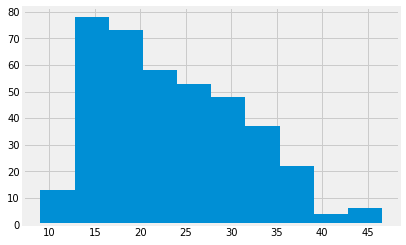

In [23]:
plt.hist(auto.mpg)

In [24]:
auto.mpg.std()

7.805007486571799

In [25]:
sample_means = []
for i in range(1000):
    mean = auto.sample(n=30).mpg.mean()
    sample_means.append(mean)

In [26]:
# list comprehension:
sample_means2 = [auto.sample(n=30).mpg.mean() for i in range(1000)]

(array([  1.,   1.,   3.,   9.,  27.,  43.,  68.,  99., 107., 146., 149.,
        131.,  91.,  55.,  39.,  20.,   4.,   3.,   2.,   2.]),
 array([18.53 , 19.032, 19.534, 20.036, 20.538, 21.04 , 21.542, 22.044,
        22.546, 23.048, 23.55 , 24.052, 24.554, 25.056, 25.558, 26.06 ,
        26.562, 27.064, 27.566, 28.068, 28.57 ]),
 <a list of 20 Patch objects>)

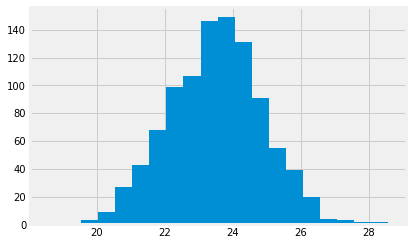

In [28]:
# sample mean distribution looks like a normal distribution!
plt.hist(sample_means, bins = 20)

In [29]:
np.std(sample_means, ddof=1)

1.3978962329317264

In [18]:
# standard error calc. If change n from 30 to 100, the std error above will go down a lot.
# how did we get from auto.mpg.std() to np.std(sample_means, ddof=1)
# experiment with different sample size n
7.805/np.sqrt(30)

1.4249915204426071

In [31]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

(array([  2.,  12.,  70., 167., 253., 280., 146.,  59.,   7.,   4.]),
 array([18.53 , 19.534, 20.538, 21.542, 22.546, 23.55 , 24.554, 25.558,
        26.562, 27.566, 28.57 ]),
 <a list of 10 Patch objects>)

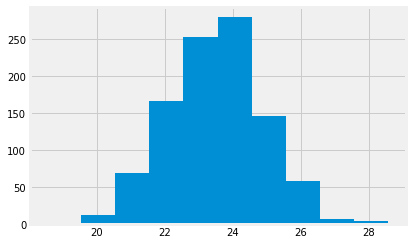

In [32]:
plt.hist(sample_means)

In [34]:
auto.mpg.mean()

23.44591836734694

In [35]:
sample.mpg.mean() 
# average of sample means is close to auto mean

24.146666666666665

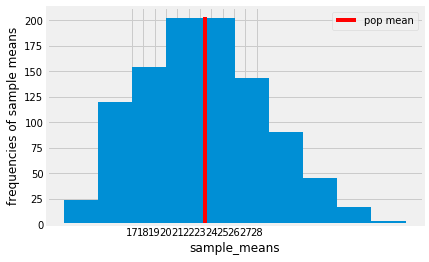

In [36]:
# %load -r 9-22 supplement.py
# n=30 is a magic number that makes distribution more normal
# taking repeating samples from auto dataset
thousand_rand_samp = [auto.sample(n=2, replace = True).mpg.mean() for i in range(1000)]

bars = plt.hist(thousand_rand_samp)

plt.vlines(x=mu, ymin=0,
           ymax=bars[0].max() + 1,
           color='r', label='pop mean')
plt.xticks(range(17, 29))
plt.xlabel('sample_means')
plt.ylabel('frequencies of sample means')

plt.legend()
plt.show()

In [ ]:
thousand_rand_samp = [auto.sample(n=30, replace = True).mpg.mean() for i in range(1000)]

bars = plt.hist(thousand_rand_samp)

plt.vlines(x=mu, ymin=0,
           ymax=bars[0].max() + 1,
           color='r', label='pop mean')
plt.xticks(range(17, 29))
plt.xlabel('sample_means')
plt.ylabel('frequencies of sample means')

plt.legend()
plt.show()

In [37]:
sigma = auto.mpg.std()


standard_error = sigma / (np.sqrt(30))

standard_error

1.424992887297358

In [38]:
# Calculate confidence interval
# The band gets narrower and narrower as sample size goes up!
confidence_interval_lower = sample.mpg.mean() - 2*standard_error

confidence_interval_upper = sample.mpg.mean() + 2*standard_error

In [39]:
confidence_interval_lower

21.296680892071947

In [40]:
confidence_interval_upper

26.996652441261382

In [ ]:
confidence_interval_lower_2 = sample2.mpg.mean() - 2*standard_error

confidence_interval_upper_2 = sample2.mpg.mean() + 2*standard_error

In [ ]:
sample3 = auto.sample(n=30)

confidence_interval_lower_3 = sample3.mpg.mean() - 2*standard_error

confidence_interval_upper_3 = sample3.mpg.mean() + 2*standard_error

In [ ]:
confidence_interval_lower_3

In [ ]:
confidence_interval_upper_3

In [ ]:
auto.mpg.mean()

# Central Limit Theorem

The Central Limit Theorem states: 
>When you add **a large number** of independent random variables, irrespective of the original distribution of these variables, **their sampling mean distribution tends towards a normal distribution** with mean equals to the mean of the original population and the standard deviation equals to $\frac{\sigma}{\sqrt{n}}$.





The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for the fact that in order to make our estimate of the $\mu$ value possible. Let's break it down:

## Standard Error

$$\sigma _{\bar{X}} = \frac{\sigma }{\sqrt{n}}$$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population


**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

$\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

But in this case, distribution shape is not 'normal' anymore. In this case the shape will be call 'T-distribution'. We will study this later in more details.


**Sample size impact on standard error of mean**<br>

Q: How should sample size influence standard error of the mean?


![error](./img/diminishing_error.png)
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


__Note-1__ In the case of finite sampling, we need to adjust the formula for standard error:

<img src="img/standard_deviation_of_x_bar.png" width="650">


__Note-2__ Note that in CLT the shape of initial distribution is not important! With enough sample size we can always achieve a distribution very close to normal one.

<img src="img/clt_with_different.png" width="650">


## Interval Estimation - Confidence Intervals

Q: Let's assume that we have a sample of size=49 and we know the standard deviation of the population is $\sigma = 5$. If we know that sampling mean is $\bar{x} = 20$. What might be a good estimate for the population mean if we also know that the population mean is bigger than 20?

Hint: What do we mean by 'a good estimate'?

[Z-scores](https://www.mathsisfun.com/data/standard-normal-distribution-table.html)

<img src="img/interval_estimation.png" width="650">

Objective is to create a 99% confidence interval around the sample mean of mpg.

In [41]:
x_bar = sample.mpg.mean()
x_bar

24.146666666666665

In [52]:
sigma_mpg = auto.mpg.std(ddof=1)
sigma_mpg

7.805007486571799

In [53]:
sigma

7.805007486571799

In [43]:
n = sample.shape[0]
n

30

In [45]:
# step size
sigma_sampling_mean = sigma / np.sqrt(n-1)
sigma_sampling_mean

1.4493535046933719

In [ ]:
# confidence level %99
z_alpha_2 =

In [ ]:
plt.hist(sample_means)

In [47]:
import scipy.stats as stats


In [49]:
# confidence level %99
z_alpha_2 = -stats.norm.ppf(0.01)
z_alpha_2

2.3263478740408408

In [50]:
(x_bar - z_alpha_2 * sigma_sampling_mean, x_bar + z_alpha_2 * sigma_sampling_mean)

(20.7749662222896, 27.51836711104373)

In [ ]:
auto.mpg.mean()

1.959963984540054


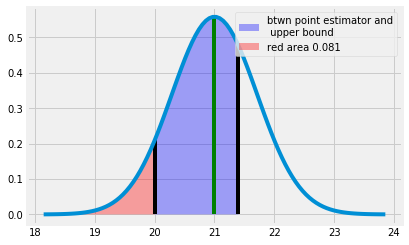

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline


# suppose population mu is 21
mu = 21
# sample mean gives us a point estimator
point_estimator = 20

# we know population variance is 49
std_error = 5/(np.sqrt(49))


# how much confidence do we require
confidence = 0.95

# alpha
alpha = 1 - confidence

# due to symmetry we divided alpha by 2
# note that to find z_alpha_over_2 we used
# standard normal distribution

z_alpha_over_2 = np.abs(stats.norm.ppf(alpha/2))

print(z_alpha_over_2)


# upper bound gives us a value so that
# 2*(the area between point_estimator - upper_bound) = confidence

upper_bound = point_estimator + z_alpha_over_2 * std_error

# now let's plot these

# a normal distribution with mean=mu and std=sigma
x = np.linspace(mu - 4*std_error, mu + 4*std_error, 100)
plt.plot(x, stats.norm.pdf(x, mu, std_error))

# a vertical line to mark point estimator
plt.vlines(point_estimator, ymin=0,
           ymax=stats.norm.pdf(point_estimator, mu, std_error))

# a vertical line for population mu
plt.vlines(mu, ymin=0,
           ymax=stats.norm.pdf(mu, mu, std_error),
           color='g')

# a vertical line for upper bound
plt.vlines(upper_bound, ymin=0,
           ymax=stats.norm.pdf(upper_bound,
                               mu, std_error))


# fill the area between upper_bound and point_estimator
plt.fill_between(x=np.linspace(point_estimator, upper_bound, 100),
                 y1=stats.norm.pdf(np.linspace(point_estimator,
                                               upper_bound, 100), mu, std_error),
                 facecolor='blue',
                 alpha=0.35,
                 label='btwn point estimator and\n upper bound')

# fill the area between point estimator and the left of it
plt.fill_between(x=np.linspace(mu - 4*std_error, point_estimator, 100),
                 y1=stats.norm.pdf(np.linspace(
                     mu - 4*std_error, point_estimator, 100), mu, std_error),
                 facecolor='red',
                 alpha=0.35,
                 label='red area %.3f' % (stats.norm.cdf(point_estimator, mu, std_error)))

plt.legend(loc='upper right')
plt.show()